# Lab: Regression

## Exercise 2: Univariate Linear Regression on real data

> So far, no forecasting has been done. The regression line has been calculated for the same training data that has been used for calculating the parameters. In this exercise, the data will be divided into training data and test data, and forecasting will be performed.

> For this exercise, you will use a data set containing the number of Facebook friends being online at a specific time. The data is provided in the file online_friends.csv. A simple time series is given. The Y-NUMBER column contains the target variable $y$. The X-NUMBER column contains the input $X$. The DAY and TIME columns are indices and not relevant for this exercise.

> The amount of friends being online at a specific time is to be forecasted based on previous values that have been measured per hour. Additionally, the Pearson correlation has to be determined for $y$ and $X$.


### Imports

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error

### Read the data

> Use the python [Pandas package](http://pandas.pydata.org/pandas-docs/stable/api.html) to load the csv file. Hint: the file is tab delimited.

In [2]:
df = pd.read_csv('./online_friends.csv', sep="\t")
df.head(5)

,DAY,TIME,Y-NUMBER,X-NUMBER
0,Monday,00:00:00,6,4
1,Monday,01:00:00,4,2
2,Monday,02:00:00,3,0
3,Monday,03:00:00,3,0
4,Monday,04:00:00,1,0


### Determine the Pearson-Correlation of y and X

>The Pearson Correlation is a measure of the linear dependence (correlation) between two variables. The result is a value between +1 and -1 inclusive. It can be used to examine the linear dependence of a target variable $y$ and the input variable $X$ in order to determine the suitability of input data to be used for linear models.

>Determine the Pearson-Correlation for $y$ and $X$ by means of the stats.pearsonr() method of the scipy module.

> Hint: pandas' dataformat is a dataframe. You can access a column by providing the name(s) of the column(s) you want like this: df['columnname'] .
If you want the values from the column (not as a series or dataframe) you can do: df['columnname'].values

In [3]:
# r = Pearson’s correlation coefficient
# p = 2-tailed p-value
# source = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
r, p = stats.pearsonr(df['Y-NUMBER'].values,df['X-NUMBER'].values)
print "Pearson’s correlation coefficient:", r
print "2-tailed p-value:", p

Pearson’s correlation coefficient: 0.8916838036059599
2-tailed p-value: 4.9927401063575495e-59


### Question 1: What is the Pearson-Correlation value for (t and x1) / (X and y)? What does it say about the relation between these two variables?

In [4]:
df_new = df.copy()
def stringTime(string):
    return datetime.strptime(string, "%H:00:00").hour
df_new['TIME'] = df['TIME'].apply(stringTime)
r, p = stats.pearsonr(df_new['TIME'].values,df_new['X-NUMBER'].values)
print "t and X:"
print "\tPearson’s correlation coefficient:", r

r, p = stats.pearsonr(df['X-NUMBER'].values,df['Y-NUMBER'].values)
print "X and y:"
print "\tPearson’s correlation coefficient:", r

t and X:
	Pearson’s correlation coefficient: 0.7713693325724988
X and y:
	Pearson’s correlation coefficient: 0.8916838036059599


The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

source = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

### Split the data into training and test data by applying cross-validation

> In order to evaluate the linear model, you’ll have to split $y$ and $X$ into training and test data, e.g. by means of cross-validation.Use the cross_validation.train_test_split() method from scikit-learn in order to receive the X_train, X_test, y_train and y_test subsets. You’ll have to set the method’s train_size parameter for determining the percentage of data to be used for training the model and how many data to be left for testing the model. Set the amount of training data on 80%.

> Set the random_state parameter of the cross validation.train test split() method to "0" in order to assure that the data is always divided in the same way. Otherwise your results will differ each time you start the script (and therefore not fit with the sample solution for this exercise)

> Make sure the X variable has the following shape: (n_rows,n_cols), n_cols will be equal to 1 at the moment.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['X-NUMBER'].values, df['Y-NUMBER'].values, train_size= 0.8, random_state=0)
X_train = np.reshape(X_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))
#y_train = np.reshape(y_train, (-1, 1))
#y_test = np.reshape(y_test, (-1, 1))
print "X_train shape:", X_train.shape
print "X_test shape:", X_test.shape

X_train shape: (134L, 1L)
X_test shape: (34L, 1L)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Apply univariate regression

> As already done in the first exercise, apply univariate linear regression. This time, apply the linear regression analysis on the newly created training data X_train and y_train

In [6]:
clf = SGDRegressor(max_iter = 1000, penalty = 'none', learning_rate = 'invscaling', eta0 = 0.01)
clf.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

### Question 2: Give the values of the coefficient and intercept

In [7]:
b = clf.intercept_
w = clf.coef_
print "Intercept:", b
print "Coefficients:", w

Intercept: [1.60209827]
Coefficients: [0.910823]


### Question3: What do the regression coefficients say about the weight of the input and the relations of the input to the target variable?

The higher this value is, the higher the weight of the input is.

Used source: http://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

### Plot the data and draw the regression line

> Use a scatter plot to plot the test data

> Plot the line that gradient descent has found

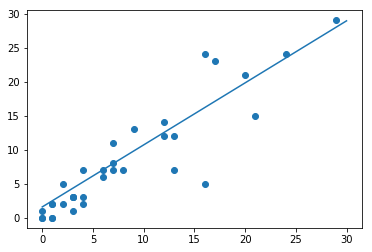

In [8]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

plt.scatter(X_test, y_test)
graph('x*w + b', (0, 30))

### Determining the mean squared error

> When developing different regression models to predict a desired target variable $y$, it’s required to define a method for evaluating the models and choose the best fit. The mean squared error is a common way to determine the difference between the estimated values and the real values of a target variable. A regression’s mean squared error is the sum of squares of the computed residuals. The residual of an observed value is the difference between the observed value and the estimated function value. The sum of squares is divided by the number of observations (data points). The result is the mean value of the squared residuals. Determine the mean squared error of y_predicted and y_test, e.g. by using numpy’s mean() method.

In [9]:
y_predicted = clf.predict(X_test)
print "mse:", mean_squared_error(y_test, y_predicted)


# used source: https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
# y_predicted = map(lambda x : x*w + b, X_test)
y_predicted = w*X_test + b
mse = ((y_predicted - y_test) ** 2).mean(axis=None)
# axis=0: the average is performed along the row, for each column, returning an array
# axis=1: the average is performed along the column, for each row, returning an array
# axis=None: the average is performed element-wise along the array, returning a single value
#print "mse:", np.mean((y_predicted - y_test)**2)
#print "mse:", mse

mse: 11.350545532059277
